In [1]:
from src.l_curve import create_L_curve
import matplotlib.pyplot as plt
import pandas as pd
import os
import firedrake

Reading outline from icepack database


2024-06-01 22:01:43.716126: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-01 22:01:43.717471: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-01 22:01:43.748099: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-01 22:01:43.878978: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-01 22:01:44.720949: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
def plot_lcurve(l_curve,loglog=False):
    # Plot
    plt.figure(figsize=(10, 6))

    # Plot scatter points
    if loglog:
        plt.loglog(l_curve['J1'], l_curve['J2'], marker='o', linestyle='', label='Regularization constant')
    else:
        plt.plot(l_curve['J1'], l_curve['J2'], marker='o', linestyle='', label='Regularization constant')

    # Plot line connecting the points
    if loglog:
        plt.loglog(l_curve['J1'], l_curve['J2'], marker='', linestyle='-')
    else:
        plt.plot(l_curve['J1'], l_curve['J2'], marker='', linestyle='-')

    # Annotate points with regularization values
    for i, txt in enumerate(l_curve['reg']):
        plt.annotate(txt, (l_curve['J1'][i], l_curve['J2'][i]))

    plt.xlabel('E')
    plt.ylabel('R')
    plt.title('Log-Log Plot of E vs R with Regularization Constants')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
variable = 'simultaneous'

#### Pine Island L-curve

In [ ]:
l_curve = create_L_curve(None, variable, outline='pine-island', mesh='pig', invert_iter = 300, workers = 2,  lcar=9e3, nosigma_lossfcn = True, drichlet_ids = [2,3,4], regularization_grad_fcn = True)

In [7]:
# Data for the new set
reg_values = [ 0.01, 0.1, 1, 10, 100, 1000, 10000]
J1_values = [ 96345.67622105534, 78489.95021182428, 
             1055.2893058650764, 1027.9826455936166, 1031.6734742146652, 1024.514731240655, 
             1025.1542646808318]
J2_values = [ 4.674823096395248, 6.875311073090092, 
             54.36880487699734, 144.7299580085007, 143.0240864061365, 154.4104059443432, 
             153.6344552930043]

# Create the dataframe
l_curve = pd.DataFrame({
    'reg': reg_values,
    'J1': J1_values,
    'J2': J2_values
})

| reg       | J1             | J2            |
|-----------|----------------|---------------|
| 0.0001    | 151334.775663  | 0.002093      |
| 0.001     | 20770.048587   | 0.015175      |
| 0.01      | 96345.676221   | 4.674823      |
| 0.1       | 78489.950212   | 6.875311      |
| 1         | 1055.289306    | 54.368805     |
| 10        | 1027.982646    | 144.729958    |
| 100       | 1031.673474    | 143.024086    |
| 1000      | 1024.514731    | 154.410406    |
| 10000     | 1025.154265    | 153.634455    |

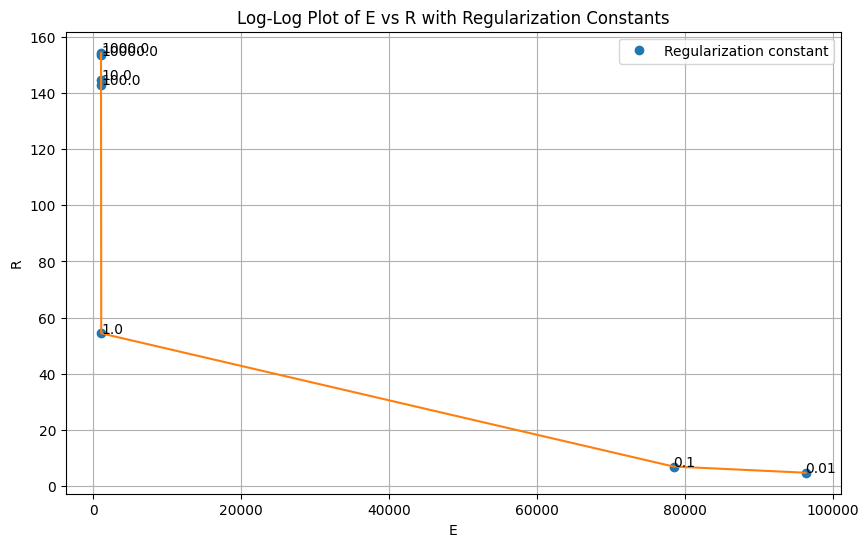

In [8]:
plot_lcurve(l_curve)

Based on these values Regularization Constant of 1.0 can be selected

#### Thwaites L-curve

In [ ]:
l_curve = create_L_curve(None, variable, outline='geojson/thwaites.geojson', mesh='thwaites', invert_iter = 300, workers = 2,  lcar=9e3, nosigma_lossfcn = True, drichlet_ids = [1,2,5,6], regularization_grad_fcn = True)

| reg   | J1             | J2          |
|-------|----------------|-------------|
| 0.01  | 3917224.696903 | 6.646062    |
| 0.1   | 771813.823367  | 9.434402    |
| 1     | 771771.826082  | 9.445090    |
| 10    | 771771.405495  | 9.445197    |
| 100   | 771771.401304  | 9.445197    |
| 1000  | 771771.401346  | 9.445197    |

In [13]:
# Data for the new set
reg_values = [0.01, 0.1, 1, 10, 100, 1000]
J1_values = [3917224.696903, 771813.823367, 771771.826082, 771771.405495, 771771.401304, 771771.401346]
J2_values = [6.646062, 9.434402, 9.445090, 9.445197, 9.445197, 9.445197]

# Create the dataframe
l_curve = pd.DataFrame({
    'reg': reg_values,
    'J1': J1_values,
    'J2': J2_values
})

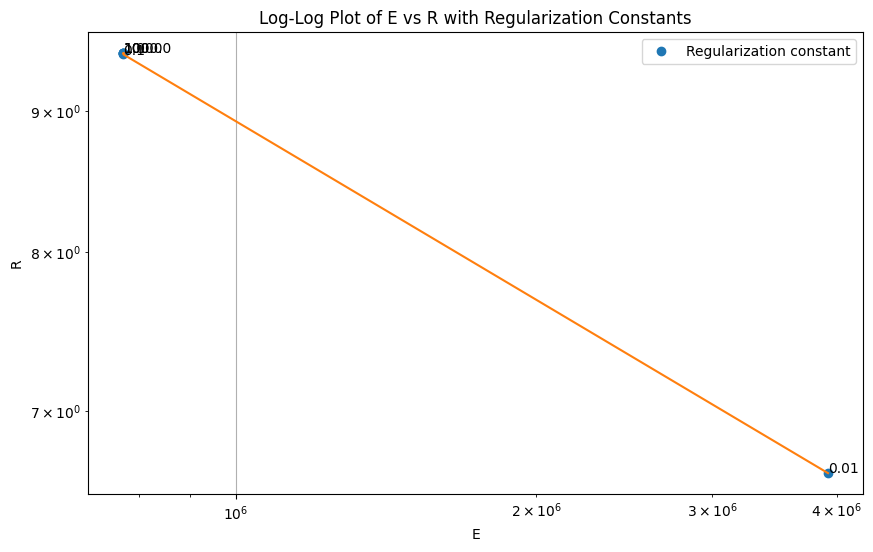

In [15]:
plot_lcurve(l_curve, loglog=True)

#### Dotson L-curve

In [ ]:
l_curve = create_L_curve(None, variable, outline='geojson/dotson-crosson.geojson', mesh='dotson', invert_iter = 300, workers = 2,  lcar=9e3, nosigma_lossfcn = True, drichlet_ids = [1,2,5,6,7,8,9,10,11], regularization_grad_fcn = True)

| reg   | J1             | J2          |
|-------|----------------|-------------|
| 0.01  | 5548.143661    | 1.012789    |
| 0.1   | 40386.153479   | 61.265443   |
| 1     | 418.481874     | 83.800619   |
| 10    | 466.561405     | 126.725303  |
| 1000  | 10929.618461   | 74.629825   |

In [8]:
# Data for the new set
reg_values = [ 0.1, 1, 10]
J1_values = [40386.15347937535, 418.48187429471, 466.5614053131742]
J2_values = [61.26544297107871, 83.80061886189961, 126.7253027139886]

# Create the dataframe
l_curve = pd.DataFrame({
    'reg': reg_values,
    'J1': J1_values,
    'J2': J2_values
})

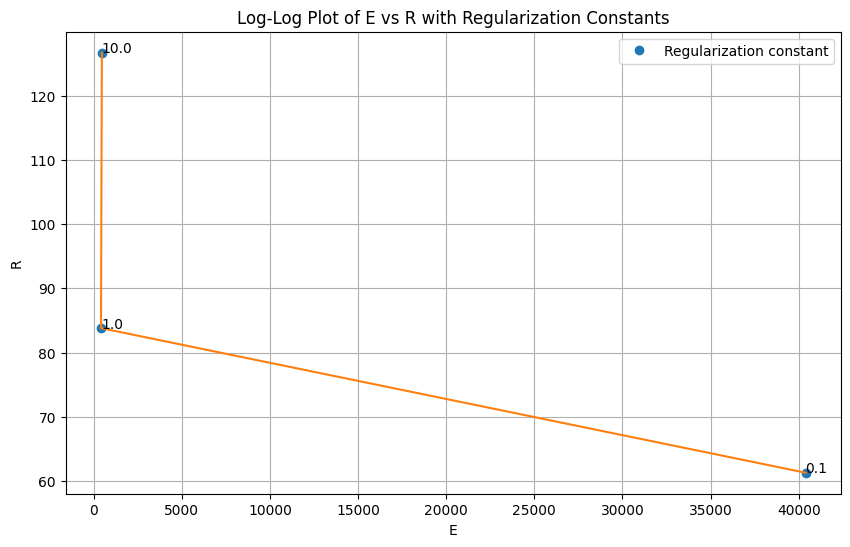

In [9]:
plot_lcurve(l_curve, loglog=False)